# LIF neuron tutorial

A membrane equation and a reset condition define our leaky-integrate-and-fire (LIF) neuron:

$$τ_m\frac{d}{dt}V(t)=Vr−V(t)+RI(t) \  \ \ \  \  \  \text{if} \ V(t)≤ V_{th} \\
V(t)=V_{reset} \ \ \ \ \ \ \ \ \ \ \ \ \ \  \ \ \ \text{otherwise} $$

where $V(t)$ is the membrane potential, $τ_m$ is the membrane time constant, $V_r$ is the leak potential, $R$ is the membrane resistance, $I(t)$ is the synaptic input current, $V_{th}$ is the firing threshold, and $V_{reset}$ is the reset voltage. 
The membrane equation describes the time evolution of membrane potential $V(t)$ in response to synaptic input and leaking of charge across the cell membrane. 

In this tutorial we will solve the equation and see the changes of the membrane potential over time while we inject a constant external input. \
We will plot the solution and then analyse the role of each parameter in the equation:
$I, τ_m, V_{th}, R$. \
$R=τ_m/C$ where $C$ is the capacitance of the neuronal membrane.

In [1]:
#Import the libriary we need
import numpy as np 
import random
import matplotlib.pyplot as plt

We first need to define all the paramenters we need to solve the equation of LIF neuron

In [2]:
#Paramenters of the LIF neuron 
v_r = 0 # mV reset potential
v_th = 15 # mV  threshold potential

C=250 #pF capacitance of the membrane
tau=10 #ms membrane time constant
R=tau/C # #GOhm resistence of the membrane

I_ext = 400 # pA constant input current

t_ref=2 #ms  #refractory period

spike_val=20 # when the spike occur this is the value I assign to the membrane potential to visualize the spike in the plot

#Parameters of my simulation
T = 100 # time of my simulation
dt=0.1 #dt indicates time step size. Choosing smaller values of dt leads to more accurate results and more computation time

N=1 #number of neurons I have

#If we want to add noise (not relevant for now)
NOISE=0 # If I put 1 then I turn on the noise
sigma=2

Function that will compute the evolution over time of the membrane potential of my neuron:


In [3]:
def LIF_neuron(v_r,v_th,R,I_ext,t_ref,spike_val,NOISE,sigma,T,dt,N):
    v=np.zeros((int(T/dt))) # arrays of 0 which will contains the approximated values of the membrane potential during the simulation 
    v[0] = v_r  #strarting value of the function v (membrane potential)

    n_spike=0 #variable which will store the number of spikes

    time_spikes=[] #stores the times of the spikes

    count=0 # counter useful for the ref period 

    x_ref=int(t_ref/dt) #number of time steps in which we are in the ref period



    for i in range(0,(int(T/dt)-1)): # loop fo each time step

        if count > x_ref: # If the ref time is finished then I can continue the Euler calculation

            #v[i+1] = v[i] + ..........*dt #Look at the equation and complete it!
            
            
        else : # If we are in the ref period the membran is = v_r
            v[i+1] = v_r 

        if v[i+1] >= v_th: # If we pass the threshold the memb is set back to v_r and a spike occured

            v[i+1]=spike_val  #to visualize the spike

            time_spikes.append((i+1)*dt) #store the time at which the neuron had the spike

            n_spike += 1 #count the number of spike the neuron
            count = 0 # reset the count (I need it for the ref period)

        count+=1 # After the computation we add 1 to the counter

    print("SIMULATION PARAMETERS:")
    print("Analysing a time window of %s ms"%T)
    print("We choose steps of %s ms, dt="%dt,dt)
    print("Total numer of steps in the calculation:",int(T/dt))
    print("************************************************************")
    print("LIF PARAMETERS:")
    print("I=%s mA, \u03C4=%s ms, C=%s pF, R=%s G\u03A9, Vr=%s mV, Vth=%s mV"%(I_ext,tau,C,R,v_r,v_th))

    print("************************************************************")
    print("SIMULATION RESULTS:")
    print("Total number of spike of the neuron =",n_spike)
    print("Times at which the spikes occured: ",time_spikes)
    print("************************************************************")
    #print(time_spikes)
    #print(n_spike)
    #print(v)
    
    return v

In [4]:
#I call the function LIF neuron.
#For the parameters I am using the values I defined at the beginning 
v_solution=LIF_neuron(v_r,v_th,R,I_ext,t_ref,spike_val,NOISE,sigma,T,dt,N)
#v_solution contains the values of the membrane potential at each time step of my simulation 

SIMULATION PARAMETERS:
Analysing a time window of 100 ms
We choose steps of 0.1 ms, dt= 0.1
Total numer of steps in the calculation: 1000
************************************************************
LIF PARAMETERS:
I=400 mA, τ=10 ms, C=250 pF, R=0.04 GΩ, Vr=0 mV, Vth=15 mV
************************************************************
SIMULATION RESULTS:
Total number of spike of the neuron = 3
Times at which the spikes occured:  [29.700000000000003, 59.300000000000004, 88.9]
************************************************************


To visualize our results we need to create a plot showing the evolution over time of the membrane potential 

In [6]:
#function to plot the result of my simulation
def plot_LIF(v_solution,tau,v_r,v_th,R,I_ext,T,dt):
    figure = plt.figure(figsize=(9,6))
    t = np.arange(0,T,dt) #time of the simulation needed for the plot
    plt.plot(t,v_solution,'g')

    plt.grid(True)
    plt.xlabel("time (ms)")
    plt.ylabel("membrane potential V (mV)")
    plt.title("Solution of $\u03C4*V(t)'=V_r-V(t)+R*I(t)$ \n $\u03C4=%s ms, V_r=%s mV,V_{th}=%s mV, R=%s G\u03A9, I=%s mA, dt=%s ms, T=%s ms$"%(tau,v_r,v_th,R,I_ext,dt,T))
    #plt.savefig("Membr_pot_vr0_1s")
    plt.show()

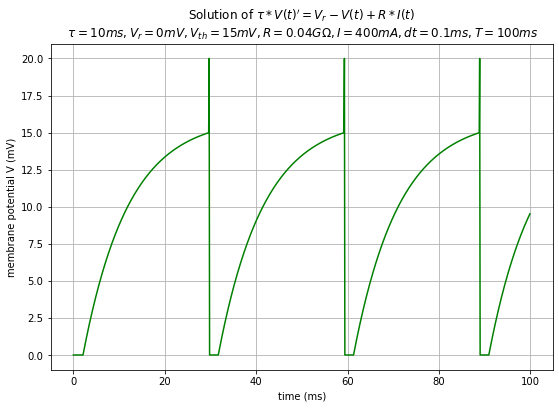

In [7]:
#PLOT THE RESULT    
plot_LIF(v_solution,tau,v_r,v_th,R,I_ext,T,dt)

Which are the parameters influencing the output? \
What happens if for example we change the external input? How the number of spikes will be affected? \
Try to increase and decrease it and see the effects

SIMULATION PARAMETERS:
Analysing a time window of 100 ms
We choose steps of 0.1 ms, dt= 0.1
Total numer of steps in the calculation: 1000
************************************************************
LIF PARAMETERS:
I=100 mA, τ=10 ms, C=250 pF, R=0.04 GΩ, Vr=0 mV, Vth=15 mV
************************************************************
SIMULATION RESULTS:
Total number of spike of the neuron = 0
Times at which the spikes occured:  []
************************************************************


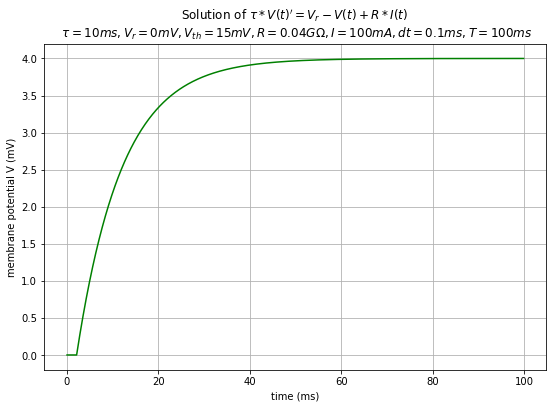

In [62]:
#Change the external input (make it smaller, value was I_ext=400)
I_ext= ..... #mA
#I call the function to compute the new LIF neuron, the other parameters are the same as before
v_new=LIF_neuron(v_r,v_th,R,I_ext,t_ref,spike_val,NOISE,sigma,T,dt,N)
plot_LIF(v_new,tau,v_r,v_th,R,I_ext,T,dt)

SIMULATION PARAMETERS:
Analysing a time window of 100 ms
We choose steps of 0.1 ms, dt= 0.1
Total numer of steps in the calculation: 1000
************************************************************
LIF PARAMETERS:
I=500 mA, τ=10 ms, C=250 pF, R=0.04 GΩ, Vr=0 mV, Vth=15 mV
************************************************************
SIMULATION RESULTS:
Total number of spike of the neuron = 6
Times at which the spikes occured:  [15.9, 31.700000000000003, 47.5, 63.300000000000004, 79.10000000000001, 94.9]
************************************************************


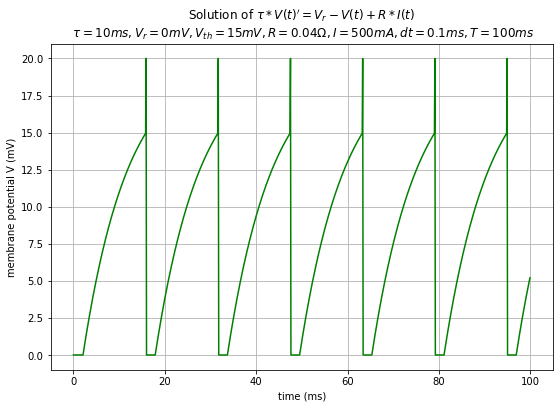

In [31]:
#Change the external input (make it bigger, value was I_ext=400)
I_ext= ..... #mA
#I call the function to compute the new LIF neuron, the other parameters are the same as before
v_new=LIF_neuron(v_r,v_th,R,I_ext,t_ref,spike_val,NOISE,sigma,T,dt,N)
#I call the function to plot the new simulation
plot_LIF(v_new,tau,v_r,v_th,R,I_ext,T,dt)

What happens to the neuron when we injected more current? Did it spike more or less? 

In [32]:
#Answer: 

What is the role of the other parameters? \
Let's analyse the role of tau.
With an input of 400 mA try to change the tau and see the effects

SIMULATION PARAMETERS:
Analysing a time window of 100 ms
We choose steps of 0.1 ms, dt= 0.1
Total numer of steps in the calculation: 1000
************************************************************
LIF PARAMETERS:
I=400 mA, τ=5 ms, C=250 pF, R=0.04 GΩ, Vr=0 mV, Vth=15 mV
************************************************************
SIMULATION RESULTS:
Total number of spike of the neuron = 6
Times at which the spikes occured:  [15.9, 31.700000000000003, 47.5, 63.300000000000004, 79.10000000000001, 94.9]
************************************************************


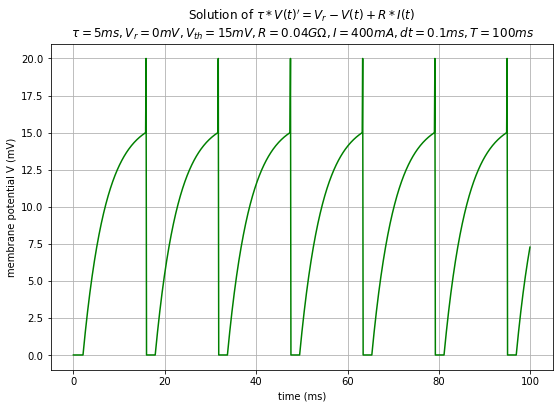

In [7]:
I_ext= 400 #mA
#Change tau (make it smaller)
tau= .... #ms
#I call the function to compute the new LIF neuron, the other parameters are the same as before
v_new=LIF_neuron(v_r,v_th,R,I_ext,t_ref,spike_val,NOISE,sigma,T,dt,N)
plot_LIF(v_new,tau,v_r,v_th,R,I_ext,T,dt)

How does this differ from the case with tau=10 ms (and same input 400mA)? \
What do you expect to happen if you make it bigger than 10ms? Will the neuron spike more or less?

In [34]:
#Answer:

Let's see if your intuition was right:

SIMULATION PARAMETERS:
Analysing a time window of 100 ms
We choose steps of 0.1 ms, dt= 0.1
Total numer of steps in the calculation: 1000
************************************************************
LIF PARAMETERS:
I=400 mA, τ=20 ms, C=250 pF, R=0.04 GΩ, Vr=0 mV, Vth=15 mV
************************************************************
SIMULATION RESULTS:
Total number of spike of the neuron = 1
Times at which the spikes occured:  [57.5]
************************************************************


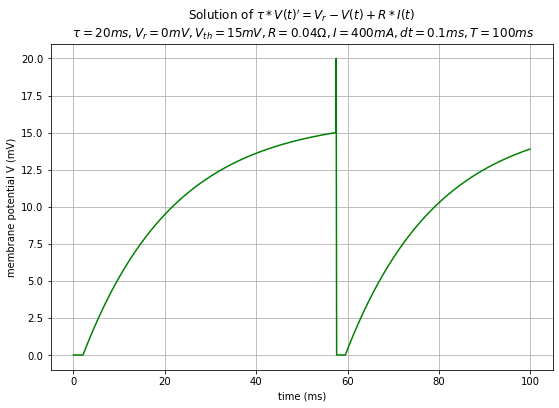

In [35]:
I_ext= 400 #mA
#Change tau (bigger to check you intuition)
tau=.... #ms
#I call the function to compute the new LIF neuron, the other parameters are the same as before
v_new=LIF_neuron(v_r,v_th,R,I_ext,t_ref,spike_val,NOISE,sigma,T,dt,N)
plot_LIF(v_new,tau,v_r,v_th,R,I_ext,T,dt)

What is the role of the other parameters? \
Let's analyse the role of R. \
Remeber $R=τ/C$

SIMULATION PARAMETERS:
Analysing a time window of 100 ms
We choose steps of 0.1 ms, dt= 0.1
Total numer of steps in the calculation: 1000
************************************************************
LIF PARAMETERS:
I=400 mA, τ=10 ms, C=500 pF, R=0.02 GΩ, Vr=0 mV, Vth=10 mV
************************************************************
SIMULATION RESULTS:
Total number of spike of the neuron = 0
Times at which the spikes occured:  []
************************************************************


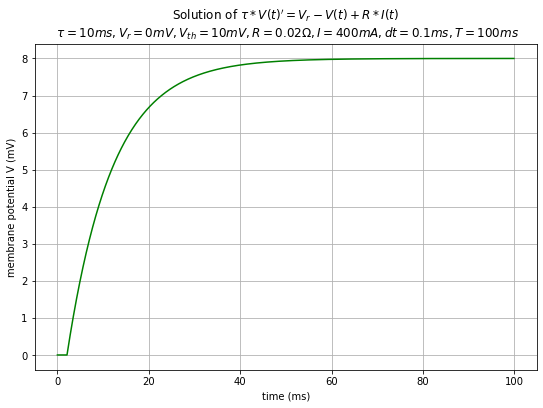

In [42]:
I_ext= 400 #mA
tau=10 #ms
#Change R by changing the capacitance of the membrane 
#Increase the capacitance (more than 250pF). What is happening?
C=.... #pF
R=tau/C
#I call the function to compute the new LIF neuron, the other parameters are the same as before
v_new=LIF_neuron(v_r,v_th,R,I_ext,t_ref,spike_val,NOISE,sigma,T,dt,N)
plot_LIF(v_new,tau,v_r,v_th,R,I_ext,T,dt)

What is happening when we increase C? Is the neuron spiking more or less? 

In [43]:
#Answer:

What will happen when we decrease C? 

In [44]:
#Answer: 

Let's check your intuition:

SIMULATION PARAMETERS:
Analysing a time window of 100 ms
We choose steps of 0.1 ms, dt= 0.1
Total numer of steps in the calculation: 1000
************************************************************
LIF PARAMETERS:
I=400 mA, τ=10 ms, C=100 pF, R=0.1 GΩ, Vr=0 mV, Vth=10 mV
************************************************************
SIMULATION RESULTS:
Total number of spike of the neuron = 20
Times at which the spikes occured:  [5.0, 9.9, 14.8, 19.700000000000003, 24.6, 29.5, 34.4, 39.300000000000004, 44.2, 49.1, 54.0, 58.900000000000006, 63.800000000000004, 68.7, 73.60000000000001, 78.5, 83.4, 88.30000000000001, 93.2, 98.10000000000001]
************************************************************


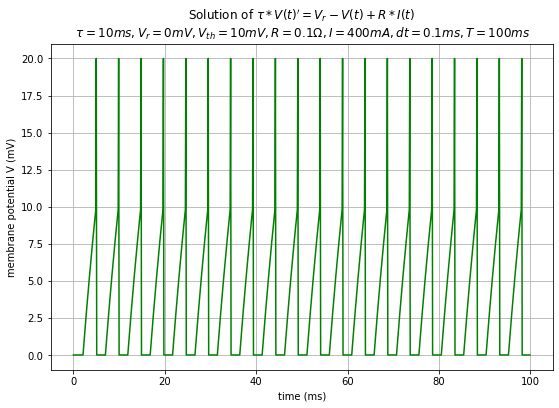

In [45]:
I_ext= 400 #mA
tau=10 #ms
#Change R by changing the capacitance of the membrane 
#Decrease the capacitance (less than 250pF). What is happening?
C=.... #pF
R=tau/C
#I call the function to compute the new LIF neuron, the other parameters are the same as before
v_new=LIF_neuron(v_r,v_th,R,I_ext,t_ref,spike_val,NOISE,sigma,T,dt,N)
plot_LIF(v_new,tau,v_r,v_th,R,I_ext,T,dt)

What is the role of the other parameters? \
Let's analyse the role of V_th.

What do you think will happen if the threshold when the neuron emits the spike is decreased? Will it spike more? 

In [46]:
#Answer: 

Let's check your intuition: 

SIMULATION PARAMETERS:
Analysing a time window of 100 ms
We choose steps of 0.1 ms, dt= 0.1
Total numer of steps in the calculation: 1000
************************************************************
LIF PARAMETERS:
I=400 mA, τ=10 ms, C=250 pF, R=0.04 GΩ, Vr=0 mV, Vth=10 mV
************************************************************
SIMULATION RESULTS:
Total number of spike of the neuron = 8
Times at which the spikes occured:  [11.9, 23.700000000000003, 35.5, 47.300000000000004, 59.1, 70.9, 82.7, 94.5]
************************************************************


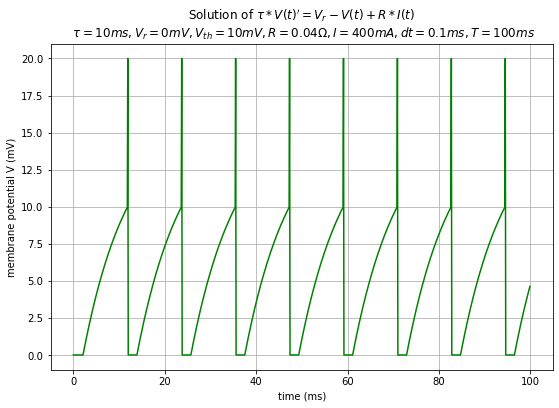

In [47]:
I_ext=400
tau=10 #ms
C=250 #pF
R=tau/C
#Change v_th, make it smaller (before it was 15 mV)
v_th= ..... #mV
#I call the function using the parameters I defined at the beginning 
v_new=LIF_neuron(v_r,v_th,R,I_ext,t_ref,spike_val,NOISE,sigma,T,dt,N)
plot_LIF(v_new,tau,v_r,v_th,R,I_ext,T,dt)

Make the parameters of the membrane potential biologically plausible. Change Vth, Vr and call again the function LIF neuron.

In [ ]:
#Answer: 
v_th=...
v_r=...
spike_val=...
#Call the function LIF_neuron and plot_LIF again to see the results:

# Conclusions
How important do you think it is to choose the right parameters for a LIF simulation? \
How can we be biological plausible? 

Discussions

# BONUS PART 
-Refractory period \
-Noise

Try to change the refractory period to see what happens \

SIMULATION PARAMETERS:
Analysing a time window of 100 ms
We choose steps of 0.1 ms, dt= 0.1
Total numer of steps in the calculation: 1000
************************************************************
LIF PARAMETERS:
I=400 mA, τ=10 ms, C=250 pF, R=0.04 GΩ, Vr=0 mV, Vth=15 mV
************************************************************
SIMULATION RESULTS:
Total number of spike of the neuron = 3
Times at which the spikes occured:  [32.7, 65.3, 97.9]
************************************************************


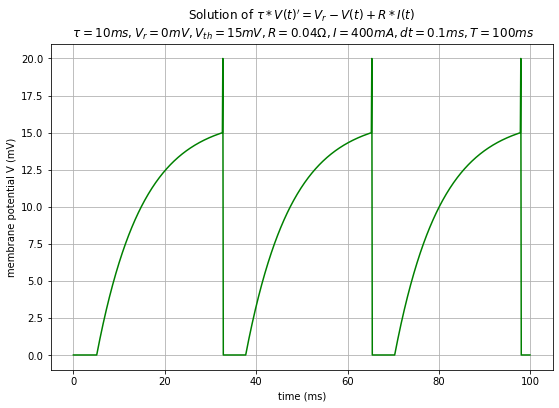

In [18]:
I_ext=400
tau=10 #ms
C=250 #pF
R=tau/C
v_th= 15 #mV
v_r=0
spike_val=20
#Change the refractory period (make it bigger than 2ms):
t_ref = ... #ms
#I call the function using the parameters I defined at the beginning 
v_new=LIF_neuron(v_r,v_th,R,I_ext,t_ref,spike_val,NOISE,sigma,T,dt,N)
plot_LIF(v_new,tau,v_r,v_th,R,I_ext,T,dt)

Turn on the noise

In [ ]:
#First you need to copy this in the function LIF_neuron and run that cell again
#V_noi = np.random.normal(loc=0.0, scale=sigma)
#v[i+1] = v[i] + ((v_r-v[i]+R*I_ext)/tau)*dt #+ NOISE*np.sqrt(dt/tau)*sigma*V_noi #euler method

SIMULATION PARAMETERS:
Analysing a time window of 100 ms
We choose steps of 0.1 ms, dt= 0.1
Total numer of steps in the calculation: 1000
************************************************************
LIF PARAMETERS:
I=400 mA, τ=10 ms, C=250 pF, R=0.04 GΩ, Vr=0 mV, Vth=15 mV
************************************************************
SIMULATION RESULTS:
Total number of spike of the neuron = 3
Times at which the spikes occured:  [20.5, 49.5, 73.9]
************************************************************


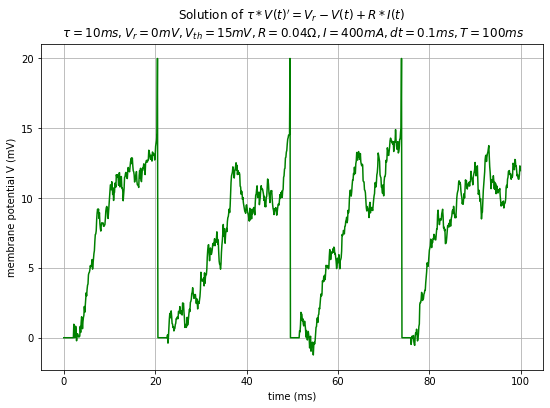

In [19]:
I_ext=400
tau=10 #ms
C=250 #pF
R=tau/C
v_th= 15 #mV
t_ref = 2 #ms
#SWITCH ON THE NOISE
NOISE=1 
sigma=2
#I call the function using the parameters I defined at the beginning 
v_new=LIF_neuron(v_r,v_th,R,I_ext,t_ref,spike_val,NOISE,sigma,T,dt,N)
plot_LIF(v_new,tau,v_r,v_th,R,I_ext,T,dt)

In [ ]:
#v[i+1] = v[i] + ((v_r-v[i]+R*I_ext)/tau)*dt